#                                  Importing Required Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Loading The Dataset

In [4]:
url = 'http://bit.ly/w-data' 
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Plotting The Data Points

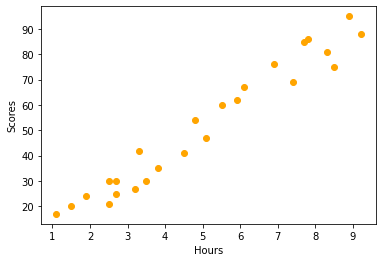

In [5]:
x = data['Hours'].values
y = data['Scores'].values
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x, y, c='orange')
plt.show()

# Preprocessing The Data

In [6]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Linear Regression Plot Function

In [8]:
def regression_plot(x, y, model, title=""):
    plt.figure(figsize=(15,9))
    plt.title(title)
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.xlim(0,10)
    plt.ylim(10,100)
    
    x_line = np.array([np.min(x) - 100, np.max(x) + 100]).reshape(-1,1)
    y_line = model.predict(x_line)
    
    plt.scatter(x, y, c='blue', label='Original Points')
    plt.plot(x_line, y_line, linewidth=4, c='yellow', label='Predicted Line')
    plt.legend()
    plt.show()

# Training The Data

In [9]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

# Fitting Best Fit Line

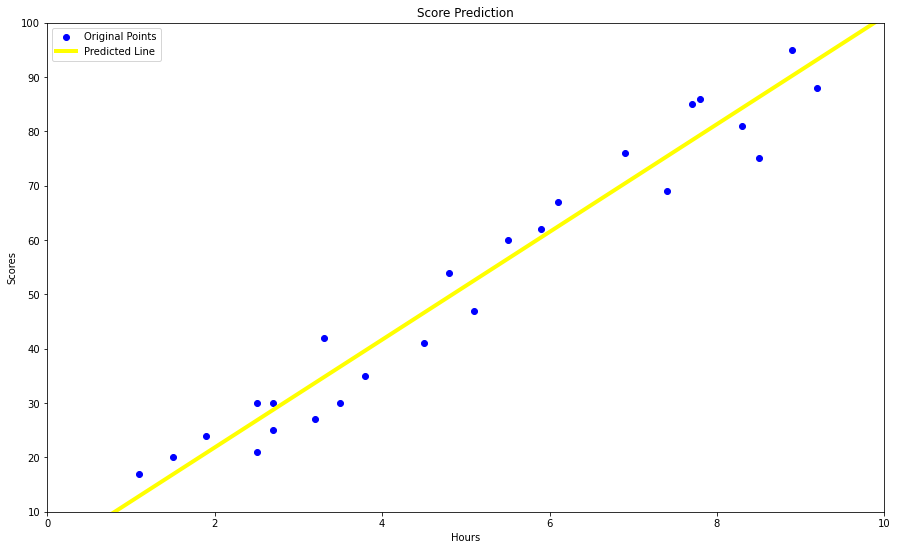

In [10]:
regression_plot(x, y, linear_model, title='Score Prediction')

# Plotting Training Set

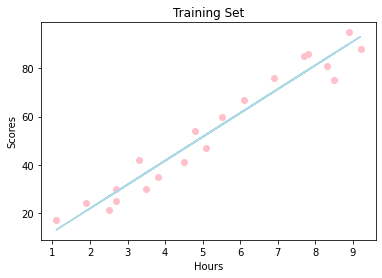

In [11]:
plt.scatter(x_train, y_train, c='pink')
plt.plot(x_train, linear_model.predict(x_train), c='lightblue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Training Set')
plt.show()

# Plotting Testing Set

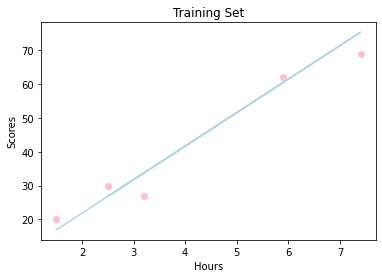

In [12]:
plt.scatter(x_test, y_test, c='pink')
plt.plot(x_test, linear_model.predict(x_test), c='lightblue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Training Set')
plt.show()

# Actual Points vs Predicted Points

In [13]:
y_pred = linear_model.predict(x_test)
new_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
new_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



# Evaluation Using Root Mean Squared Error

In [14]:
mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mean_squared_error}")

Mean Squared Error: 4.6474476121003665


# Predicted Score For Studying After 9.25 Hours

In [15]:
#change the number into 2D array
my_study_hours = [[9.25]]
print(f"After 9.25 hours studying, my score is: {round(linear_model.predict(my_study_hours)[0],2)}")

After 9.25 hours studying, my score is: 93.69
